# Case Classificando bebidas

Será que é possível classificarmos o tipo de bebida dado alguns atributos como volume, quantidade de calorias e quantidade de cafeína?

Na aula de hoje vamos explorar o dataset caffeine para construirmos um classificador com base em modelos de árvores.

## Atributos
**bebida:** nome da bebida.

**Volume (ml):** Quantidade em volume.

**Calorias:** Quantidade de calorias.

**Cafeína(mg):** Quantidade de cafeína.

**tipo:** tipo de bebida. (Café, Bebidas Energéticas, Shots Energéticos, Refrigerantes, Chá, Água)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
dados = pd.read_csv("dados/caffeine.csv", sep=",")

In [3]:
dados.shape

(610, 5)

In [4]:
dados.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [5]:
set(dados['type'])

{'Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea', 'Water'}

In [6]:
dados.isnull().sum()

drink            0
Volume (ml)      0
Calories         0
Caffeine (mg)    0
type             0
dtype: int64

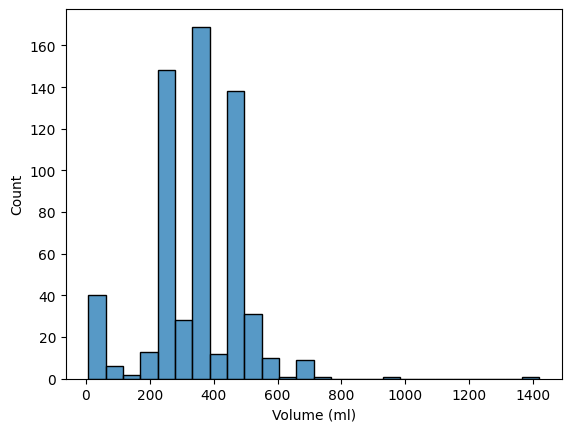

In [7]:
sns.histplot(data=dados, x="Volume (ml)")
plt.show()

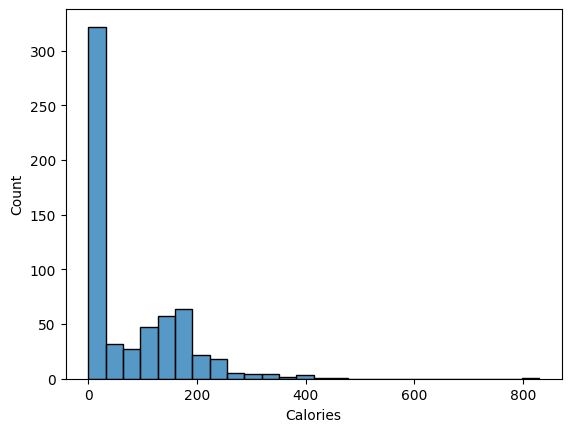

In [8]:
sns.histplot(data=dados, x="Calories")
plt.show()

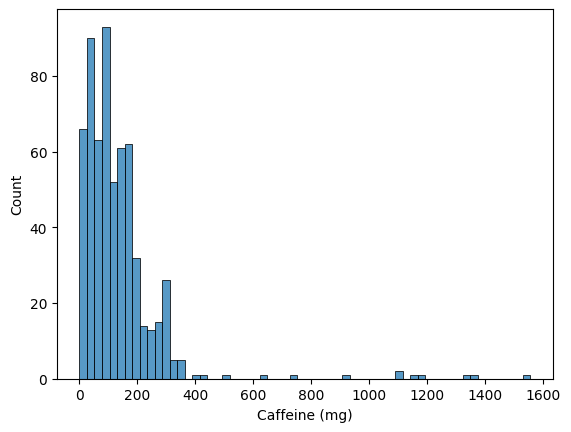

In [9]:
sns.histplot(data=dados, x="Caffeine (mg)")
plt.show()

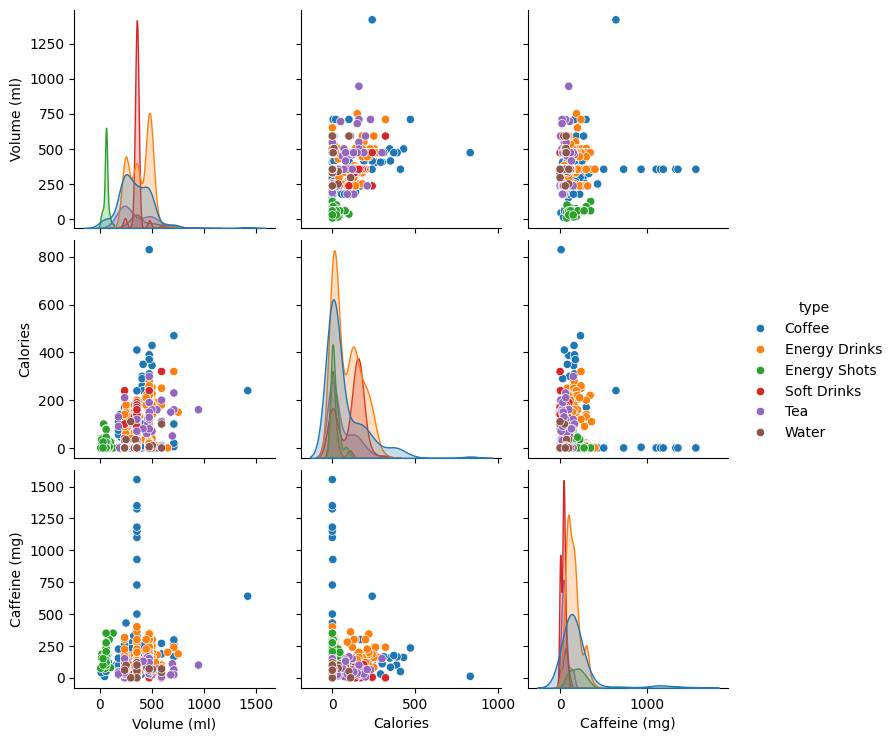

In [10]:
sns.pairplot(dados, vars=["Volume (ml)", "Calories", "Caffeine (mg)"],
             hue="type")
plt.show()

In [11]:
# Separando os dados
X = dados.drop(columns=["type", "drink"])
y = dados["type"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=7)

In [13]:
dt = DecisionTreeClassifier(random_state=7, criterion="gini", max_depth=3)

In [14]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [15]:
y_pred = dt.predict(X_test)

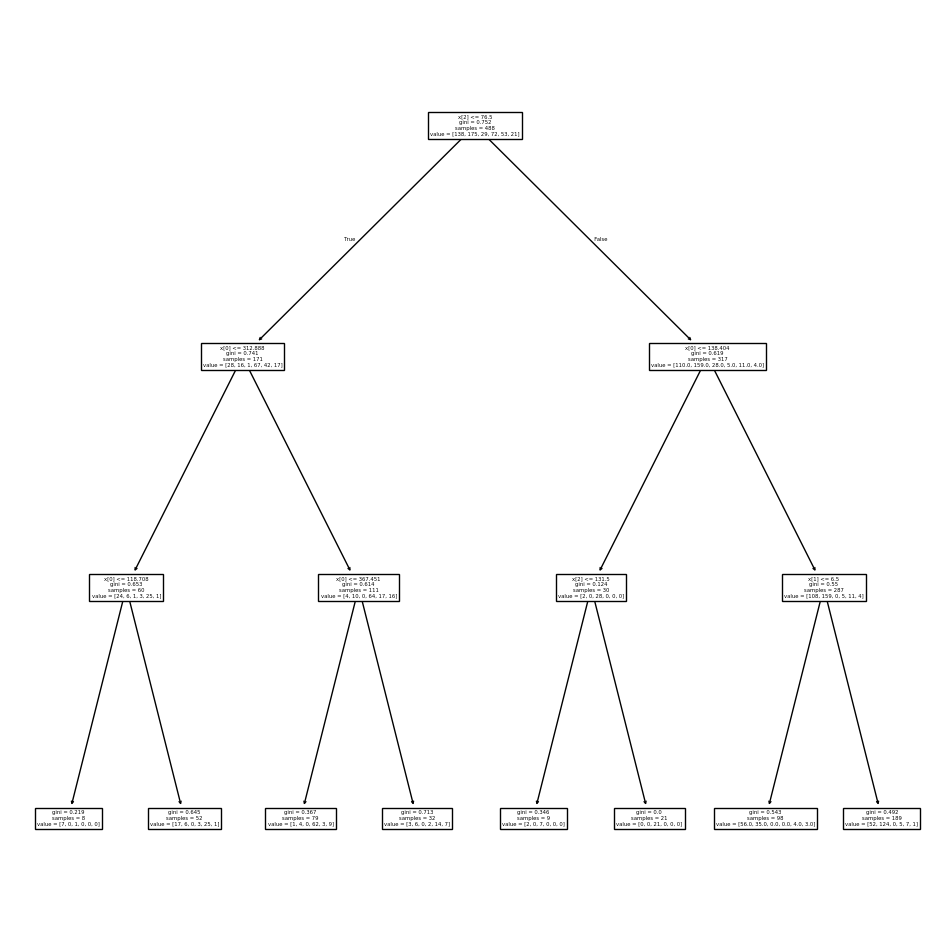

In [16]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dt)
plt.show()

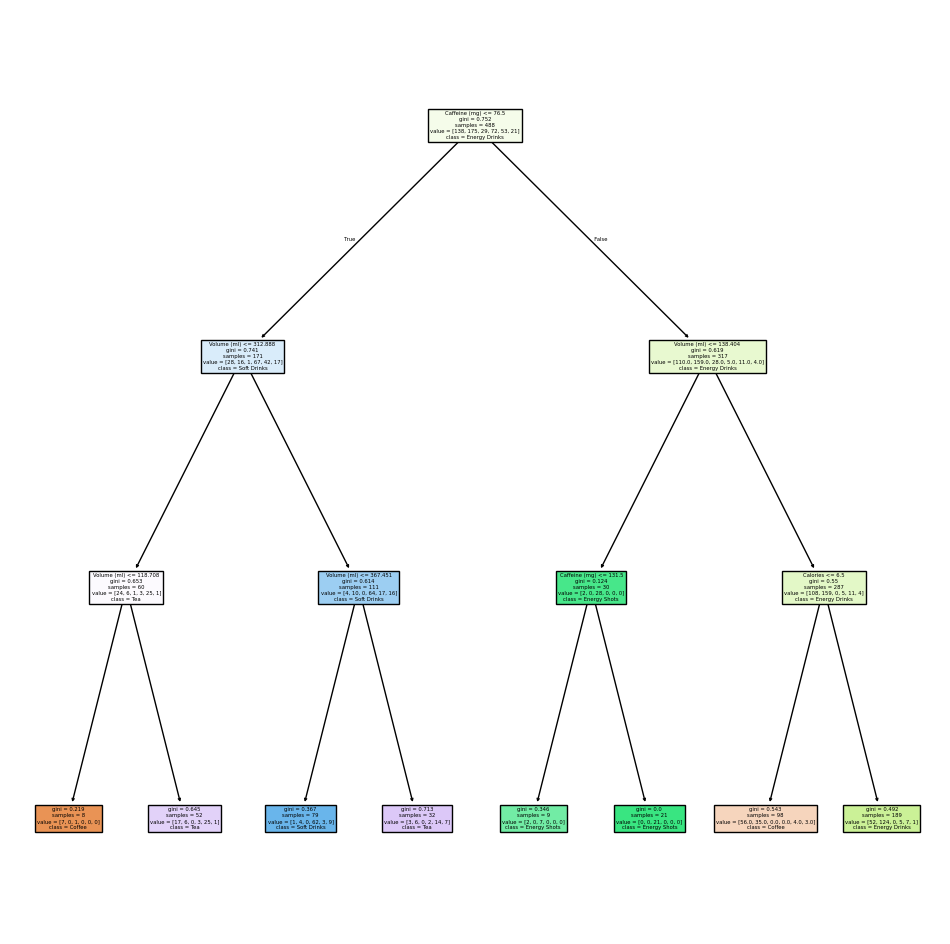

In [17]:
class_names = ["Coffee", "Energy Drinks", "Energy Shots", "Soft Drinks",
               "Tea", "Water"]
label_names = ["Volume (ml)", "Calories", "Caffeine (mg)"]
fig, ax = plt.subplots(figsize = (12, 12))
plot_tree(dt, feature_names=label_names, class_names=class_names, filled=True)
plt.show()

In [18]:
accuracy_score(y_test, y_pred)

0.6557377049180327

In [19]:
dados['type'].value_counts()

type
Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: count, dtype: int64

Se as variáveis target do seu modelo de decision tree não estão equilibradas, isso pode afetar a precisão e a acurácia do seu modelo, especialmente se a classe minoritária é importante para o seu problema.

Utilize algoritmos que são robustos a desequilíbrios de classe: Alguns algoritmos de machine learning são projetados para serem robustos a desequilíbrios de classe. Alguns exemplos incluem o **Random Forests**.

Existem algumas técnicas que podem ser usadas para equilibrar classes com um modelo de Random Forest. Duas abordagens comuns são o ajuste do parâmetro **class_weight** e a aplicação de técnicas de reamostragem.

O parâmetro class_weight permite atribuir pesos diferentes às classes no modelo de Random Forest. Ele pode ser ajustado para dar mais peso às classes minoritárias, ajudando a equilibrar o modelo. Você pode definir o valor do parâmetro "class_weight" como **"balanced"**, o que fará com que o modelo ajuste automaticamente os pesos de acordo com a frequência de cada classe.

Técnicas de reamostragem:
Outra abordagem comum é usar técnicas de reamostragem, como oversampling e undersampling, para equilibrar as classes. Oversampling envolve a duplicação ou triplicação de observações da classe minoritária, enquanto undersampling envolve a redução do número de observações da classe majoritária. Isso ajuda a garantir que o modelo seja treinado com um número igual de observações para cada classe.

Você pode experimentar essas técnicas individualmente ou combiná-las para obter melhores resultados em termos de equilíbrio de classes em seu modelo de Random Forest. É importante lembrar que o ajuste correto de hiperparâmetros é fundamental para obter bons resultados em qualquer modelo de machine learning.

In [20]:
# Aplicar SMOTE para oversampling da classe minoritária
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

Nesse exemplo, SMOTE é utilizado para gerar dados sintéticos e equilibrar as classes antes de ajustar o modelo de Random Forest. Note que o método fit_resample é utilizado para aplicar o oversampling na classe minoritária. Por fim, o modelo é avaliado com a métrica de acurácia no conjunto de teste.

Oversampling envolve a criação de mais exemplos para a classe minoritária, aumentando sua representação no conjunto de dados. As técnicas comuns de oversampling incluem a replicação de exemplos existentes (cópia de exemplos da classe minoritária), a geração sintética de novos exemplos com base em exemplos existentes, como a técnica SMOTE (Synthetic Minority Over-sampling Technique), ou a combinação de ambas as abordagens.

In [21]:
X_train.shape

(488, 3)

In [22]:
X_train_os.shape

(1050, 3)

In [23]:
rf = RandomForestClassifier(criterion="entropy", n_estimators=80,
                            max_depth = 7, class_weight="balanced",
                            random_state=7)
rf.fit(X_train_os, y_train_os)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, n_estimators=80, random_state=7)

In [24]:
estimator_rf = rf.estimators_

In [25]:
y_pred_random_forest = rf.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred_random_forest)

0.7131147540983607

In [27]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.8770491803278688
0.7131147540983607
